[California Housing Dataset](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html)

### Loading the dataset

In [1]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

### Preparing the data


In [2]:
import pandas as pd
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

### Setting up K-Fold Cross-Validation

In [3]:
from sklearn.model_selection import KFold # KFold class
# variable 'k' to 5 -> the number of folds for the KFold cross-validator
k = 5
# creates an instance of the KFold class, specifying 'k' as the number of splits, enabling shuffling, and setting the random state to 42.
kf = KFold(n_splits=k, shuffle=True, random_state=42)

### Initializing the model

In [4]:
from sklearn.linear_model import LinearRegression # LinearRegression class
# variable -> model
model = LinearRegression()

### Performing cross-validation

In [5]:
from sklearn.model_selection import cross_val_score # cross_val_score ->  function
# FIVE arguments: model, X, y, cv, & scoring
scores = cross_val_score(model, X, y, cv=kf, scoring='r2') # cv is the cross-validation splitting strategy

### Calculating the average R2 score

In [6]:
import numpy as np

average_r2 = np.mean(scores)

print(f"R² Score for each fold: {[round(score, 4) for score in scores]}")
print(f"Average R² across {k} folds: {average_r2:.2f}")

R² Score for each fold: [0.5758, 0.6137, 0.6086, 0.6213, 0.5875]
Average R² across 5 folds: 0.60


### Displaying the final results

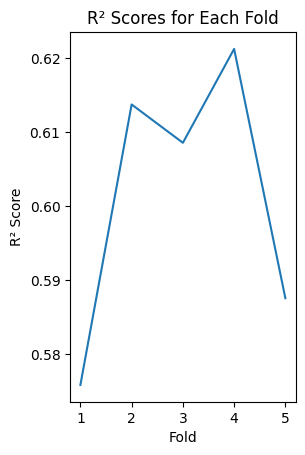

In [11]:
import matplotlib.pyplot as plt

# Assuming you have the data and the scores already calculated
feature_names = data.feature_names
X = pd.DataFrame(data.data, columns=feature_names)

plt.subplot(1, 2, 2)
plt.plot(range(1, k+1), scores)
plt.xlabel("Fold")
plt.ylabel("R² Score")
plt.title("R² Scores for Each Fold")
plt.show()